# Assignment 6

### 1.复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import numpy as np

In [2]:
def tf_reset():
    try:
        sess.close() # close tf session
    except:
        pass
    tf.reset_default_graph() #reset the global graph
    return tf.Session() # start a new session

In [3]:
sess = tf_reset()

# init inputs
a = tf.constant(1)
b = tf.constant(2)

# plus
c = a + b

c_run = sess.run(c)

print(c_run)
print('c = {}'.format(c_run))

3
c = 3


In [4]:
sess = tf_reset()

# init inputs
a = tf.placeholder(dtype = tf.float64, shape = [1], name = 'a_placeholder')
b = tf.placeholder(dtype = tf.float64, shape = [1], name = 'b_placeholder')

c = a + b

# run
c0_run = sess.run(c, feed_dict = {a: [1.0], b: [2.0]})
c1_run = sess.run(c, feed_dict = {a: [2.0], b: [4.0]})

print(c0_run)
print(c1_run)

[3.]
[6.]


In [5]:
# When we don't know the size of input, set the shape of input as None
sess = tf_reset()

a = tf.placeholder(dtype = tf.float64, shape = [None], name = 'a_placeholder')
b = tf.placeholder(dtype = tf.float64, shape = [None], name = 'b_placeholder')

c = a + b

c0_run = sess.run(c, feed_dict = {a: [1.0], b: [2.0]})
c1_run = sess.run(c, feed_dict = {a: [1.0, 2.0], b: [2.0, 4.0]})

print(a)
print(a.get_shape())
print(b)
print(b.get_shape())

print(c0_run)
print(c1_run)



Tensor("a_placeholder:0", shape=(?,), dtype=float64)
(?,)
Tensor("b_placeholder:0", shape=(?,), dtype=float64)
(?,)
[3.]
[3. 6.]


In [6]:
sess = tf_reset()

a = tf.constant([[-1],[-2],[-3]], dtype = tf.float64)
b = tf.constant([[1, 2, 3]], dtype = tf.float64)

a_run, b_run = sess.run([a, b])
print(a_run)
print(b_run)

[[-1.]
 [-2.]
 [-3.]]
[[1. 2. 3.]]


In [7]:
c = a + b

c_run = sess.run(c)
print(c_run)
print(sess.run(b + b))

[[ 0.  1.  2.]
 [-1.  0.  1.]
 [-2. -1.  0.]]
[[2. 4. 6.]]


In [8]:
c_elementwise = a * b
c_matmul = tf.matmul(b, a)

c_elementwise_run, c_matmul_run = sess.run([c_elementwise, c_matmul])

print(a_run)
print(b_run)
print(c_elementwise_run)
print(c_matmul_run)

[[-1.]
 [-2.]
 [-3.]]
[[1. 2. 3.]]
[[-1. -2. -3.]
 [-2. -4. -6.]
 [-3. -6. -9.]]
[[-14.]]


In [9]:
c0 = 2 * b #b + b
c1 = c0 + 1

c0_run, c1_run = sess.run([c0, c1])

print(c0_run)
print(c1_run)


[[2. 4. 6.]]
[[3. 5. 7.]]


In [10]:
c = tf.reduce_mean(b)

c_run = sess.run(c)
print(c_run)

2.0


In [11]:
sess = tf_reset()

#inputs
b = tf.constant([[1,2,3]], dtype = tf.float64)

sess = tf.Session()

b_run = sess.run(b)
print(b_run)

[[1. 2. 3.]]


In [12]:
# create variables
var_init_value = [[2.,4,6]]
var = tf.get_variable(name='Myvar',shape=[1,3],dtype=tf.float64,initializer=tf.constant_initializer(var_init_value))

# print(var)
# print(tf.global_variables())

In [13]:
c = b + var
print(b)
print(var)
print(c)

Tensor("Const:0", shape=(1, 3), dtype=float64)
<tf.Variable 'Myvar:0' shape=(1, 3) dtype=float64_ref>
Tensor("add:0", shape=(1, 3), dtype=float64)


In [14]:
init_op = tf.global_variables_initializer()
print(sess.run(init_op))

None


In [15]:
c_run = sess.run(c)

print(b_run)
print(var_init_value)
print(c_run)

[[1. 2. 3.]]
[[2.0, 4, 6]]
[[3. 6. 9.]]


(10000, 1)


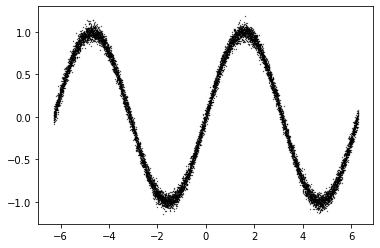

In [16]:
inputs = np.linspace(-2*np.pi, 2*np.pi, 10000)[:, None]
np.random.seed(10000) # set seed to get same random disturbed values
outputs = np.sin(inputs) + 0.05 * np.random.normal(size = [len(inputs), 1]) # add random small value

print(inputs.shape)
plt.scatter(inputs[:,0], outputs[:,0], s = 0.1, color = 'k', marker = 'o')

In [25]:
sess = tf_reset()

def create_model():
    # inputs
    input_ph = tf.placeholder(dtype = tf.float32, shape = [None, 1], name = 'input')
    output_ph = tf.placeholder(dtype = tf.float32, shape  = [None, 1], name = 'output')
    
    # create variables
    W0 = tf.get_variable(name='W0', shape = [1, 20], initializer=tf.contrib.layers.xavier_initializer())
    W1 = tf.get_variable(name='W1', shape = [20, 20], initializer=tf.contrib.layers.xavier_initializer())
    W2 = tf.get_variable(name='W2', shape = [20, 1], initializer=tf.contrib.layers.xavier_initializer())
    
    b0 = tf.get_variable(name = 'b0', shape = [20], initializer=tf.constant_initializer(0.0))
    b1 = tf.get_variable(name = 'b1', shape = [20], initializer=tf.constant_initializer(0.0))
    b2 = tf.get_variable(name = 'b2', shape = [1], initializer=tf.constant_initializer(0.0))
    
    weights = [W0, W1, W2]
    biases = [b0, b1, b2]
    activations = [tf.nn.relu, tf.nn.sigmoid, None] # activation functions
    
    # create computation graph
    layer = input_ph
    for W, b, activation in zip(weights, biases, activations):
        layer = tf.matmul(layer, W) + b
        if activation is not None:
            layer = activation(layer)
            
    output_pred = layer 
    
    return input_ph, output_ph, output_pred

input_ph, output_ph, output_pred = create_model()
# print(input_ph[0][0])
# print(input_ph.get_shape())
# print(output_ph.get_shape())
# loss
mse = tf.reduce_mean(0.5 * tf.square(output_pred - output_ph))
# optimize
opt = tf.train.AdamOptimizer().minimize(mse)

sess.run(tf.global_variables_initializer())

saver = tf.train.Saver()

# run training
batch_size = 32
for training_step in range(10000):
    indices = np.random.randint(low = 0, high=  len(inputs), size = batch_size)
    input_batch = inputs[indices]
    output_batch = outputs[indices]
    
    _, mse_run = sess.run([opt, mse], feed_dict = {input_ph: input_batch, output_ph: output_batch})
    if training_step % 1000 == 0:
        print('{0} mse: {1}'.format(training_step, mse_run))
        saver.save(sess, './model/model1.ckpt')
        


0 mse: 1.0253978967666626
1000 mse: 0.0630018338561058
2000 mse: 0.033094197511672974
3000 mse: 0.017109600827097893
4000 mse: 0.00995467696338892
5000 mse: 0.013315992429852486
6000 mse: 0.015593199990689754
7000 mse: 0.016983460634946823
8000 mse: 0.01063782162964344
9000 mse: 0.003367115743458271


In [48]:
np.random.randint(low = 0., high = 10, size = 3)

array([6, 8, 9])

INFO:tensorflow:Restoring parameters from model.ckpt
Tensor("add_2:0", shape=(?, 1), dtype=float32)
[[ 0.05208452]
 [ 0.05311538]
 [ 0.05414645]
 ...
 [-0.19144689]
 [-0.19084243]
 [-0.19023885]]


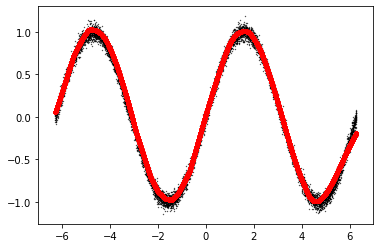

In [55]:
# prediction
sess = tf_reset()

input_ph, output_ph, output_pred = create_model()

saver = tf.train.Saver()
saver.restore(sess, 'model.ckpt')

output_pred_run = sess.run(output_pred, feed_dict = {input_ph: inputs})

print(output_pred)
print(output_pred_run)

plt.scatter(inputs[:,0], outputs[:,0], c='k', marker = 'o', s=0.1)
plt.scatter(inputs[:,0], output_pred_run[:,0], c='r',marker = 'o',s=10)

In [58]:
# Tips and tricks
a = tf.constant(np.random.random((4,1)))
b = tf.constant(np.random.random((1,4)))

# c = a * b
c = tf.matmul(a, b)
print(c.get_shape())

(4, 4)


In [59]:
sess = tf_reset()
a = tf.get_variable('a', shape = [4, 6])
b = tf.get_variable('b', shape = [2,7])

for var in tf.global_variables():
    print(var.name)

a:0
b:0


In [60]:
help(tf.reduce_mean)

Help on function reduce_mean in module tensorflow.python.ops.math_ops:

reduce_mean(input_tensor, axis=None, keep_dims=False, name=None, reduction_indices=None)
    Computes the mean of elements across dimensions of a tensor.
    
    Reduces `input_tensor` along the dimensions given in `axis`.
    Unless `keep_dims` is true, the rank of the tensor is reduced by 1 for each
    entry in `axis`. If `keep_dims` is true, the reduced dimensions
    are retained with length 1.
    
    If `axis` has no entries, all dimensions are reduced, and a
    tensor with a single element is returned.
    
    For example:
    
    ```python
    # 'x' is [[1., 1.]
    #         [2., 2.]]
    tf.reduce_mean(x) ==> 1.5
    tf.reduce_mean(x, 0) ==> [1.5, 1.5]
    tf.reduce_mean(x, 1) ==> [1.,  2.]
    ```
    
    Args:
      input_tensor: The tensor to reduce. Should have numeric type.
      axis: The dimensions to reduce. If `None` (the default),
        reduces all dimensions.
      keep_dims: If true, 

In [61]:
help(tf.contrib.layers.xavier_initializer)

Help on function xavier_initializer in module tensorflow.contrib.layers.python.layers.initializers:

xavier_initializer(uniform=True, seed=None, dtype=tf.float32)
    Returns an initializer performing "Xavier" initialization for weights.
    
    This function implements the weight initialization from:
    
    Xavier Glorot and Yoshua Bengio (2010):
             [Understanding the difficulty of training deep feedforward neural
             networks. International conference on artificial intelligence and
             statistics.](
             http://www.jmlr.org/proceedings/papers/v9/glorot10a/glorot10a.pdf)
    
    This initializer is designed to keep the scale of the gradients roughly the
    same in all layers. In uniform distribution this ends up being the range:
    `x = sqrt(6. / (in + out)); [-x, x]` and for normal distribution a standard
    deviation of `sqrt(2. / (in + out))` is used.
    
    Args:
      uniform: Whether to use uniform or normal distributed random initial

In [68]:
sess = tf_reset()

with tf.variable_scope('layer0'):
    W0 = tf.get_variable(name = 'W0', shape = [1, 20], initializer=tf.contrib.layers.xavier_initializer())    
    b0 = tf.get_variable(name = 'b0', shape = [20], initializer=tf.constant_initializer(0.))

with tf.variable_scope('layer1'):
    W0 = tf.get_variable(name = 'W1', shape = [20, 20], initializer=tf.contrib.layers.xavier_initializer())    
    b0 = tf.get_variable(name = 'b1', shape = [20], initializer=tf.constant_initializer(0.))

with tf.variable_scope('layer2'):
    W0 = tf.get_variable(name = 'W2', shape = [20, 1], initializer=tf.contrib.layers.xavier_initializer())    
    b0 = tf.get_variable(name = 'b2', shape = [1], initializer=tf.constant_initializer(0.))

var_names = sorted([v.name for v in tf.global_variables()])
print(var_names)
# print(sorted([v.value for v in tf.global_variables()]))

['layer0/W0:0', 'layer0/b0:0', 'layer1/W1:0', 'layer1/b1:0', 'layer2/W2:0', 'layer2/b2:0']


In [67]:
## specify GPU and memory
gpu_device = 0
gpu_frac = 0.5

import os
os.environ['CUDA_VISIBLE_DEVICES'] = str(gpu_device)

gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_frac)
config = tf.ConfigProto(gpu_options=gpu_options)

tf_sess = tf.Session(graph=tf.Graph(), config = config)
print(gpu_options)
print(config)

per_process_gpu_memory_fraction: 0.5

gpu_options {
  per_process_gpu_memory_fraction: 0.5
}



### 2.回答以下理论题目?

#### 1. Compared to FNN, what is the biggest advantage of CNN?

Ans: There are Much fewer parameters that need to be learned in CNN compared to FNN, because of the shared filters.

#### 2. Suppose your input is a 100 by 100 gray image, and you use a convolutional layer with 50 filters that are each 5x5. How many parameters does this hidden layer have (including the bias parameters)? 

Ans: 
$$ 5*5*50 + 1*50 = 1300 $$

#### 3. What are "local invariant" and "parameter sharing" ?

Ans: Local invariant means that the property including pixels, size, etc, of a image remains unchanged in different positions. Parameters sharing is that a filter is used to perform convolution for all small part of pixel frame in a picture.

#### 4. Why we use batch normalization ?

Ans: 1. Normalize the input of every hidden layer to a similar distribution to improve the learning of model; 2. change the distribution of input of each hidden layer to avoid very small or 0 gradient when putted in activation function, so that the model can be trained better.

#### 5. What problem does dropout try to solve ?

Ans: It's a method to reduce overfitting in training by preventing complex co-adaptation by randomly removing some connections during propogation.

#### 6.  Is the following statement correct and why ? "Because pooling layers do not have parameters, they do not affect  the backpropagation(derivatives) calculation"

Ans: This is wrong, because the pooling layers also partly determine the number of parameters and the size of output, and will certainly affect backpropagation.

### 3. 实践题

#### 3.1 In the first session of the practical part, you will implement an image classification model using any deep learning libraries that you are familiar with,  which means, except for tensorflow and keras, you can also use pytorch/caffe/... .  The dataset used in this session is the cifar10 which contains 50000 color (RGB) images, each with size 32x32x3.  All 50000 images are classified into ten categories. 

In [19]:
# !pip install tensorflow==1.8.0

In [3]:
# !which python

In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt
# from tensorflow.keras import keras.datasets, keras.layers, keras.models as datasets, layers, modelsl
# from tensorflow import datasets, layers, models

In [13]:
print(tf.__version__)

1.8.0


Load the dataset. 

In [6]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 78s 0us/step


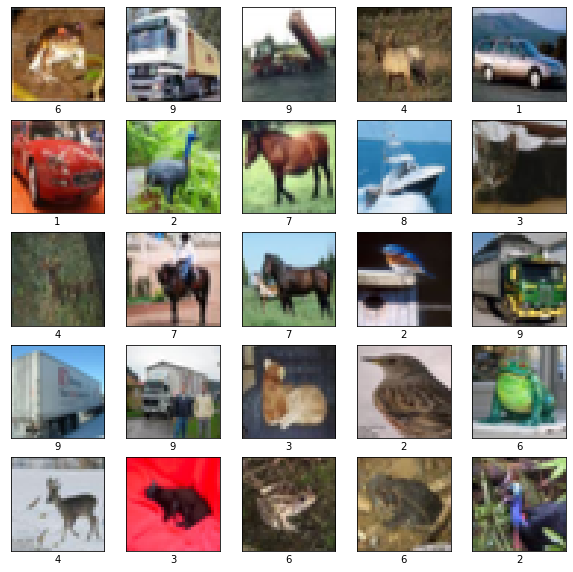

In [15]:
plt.figure(figsize=(10,10))
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(x_train[i-1])
#     plt.text(3,10,str(y_train[i-1]))
    plt.xlabel(str(y_train[i-1][0]))
    plt.xticks([])
    plt.yticks([])
plt.show()

##### It is your time to build your model. Try your best to build a model with good performance on the test set.

In [9]:
# normalize all pixel values to 0-1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [27]:
## create model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'))

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                65600     
__________

In [31]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 62s 1ms/step - loss: 1.5329 - acc: 0.4385 - val_loss: 1.2696 - val_acc: 0.5425
Epoch 2/10
50000/50000 [==============================] - 52s 1ms/step - loss: 1.1843 - acc: 0.5798 - val_loss: 1.0994 - val_acc: 0.6065
Epoch 3/10
50000/50000 [==============================] - 52s 1ms/step - loss: 1.0246 - acc: 0.6403 - val_loss: 1.0462 - val_acc: 0.6333
Epoch 4/10
50000/50000 [==============================] - 48s 965us/step - loss: 0.9239 - acc: 0.6758 - val_loss: 0.9416 - val_acc: 0.6694
Epoch 5/10
50000/50000 [==============================] - 49s 975us/step - loss: 0.8511 - acc: 0.7022 - val_loss: 0.9253 - val_acc: 0.6802
Epoch 6/10
50000/50000 [==============================] - 51s 1ms/step - loss: 0.7901 - acc: 0.7253 - val_loss: 0.8685 - val_acc: 0.6972
Epoch 7/10
50000/50000 [==============================] - 55s 1ms/step - loss: 0.7381 - acc: 0.7431 - val_loss: 0.8948 - val

10000/10000 [==============================] - 3s 292us/step
Test loss = 0.8499723802566528
Test accuracy = 0.7165


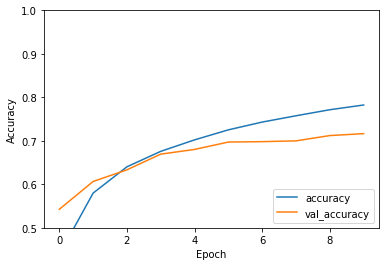

In [36]:
#evaluate model
plt.plot(history.history['acc'], label = 'accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test loss = {0}'.format(test_loss))
print('Test accuracy = {0}'.format(test_accuracy))

### 4. Optional 

##### Do you want to build a CNN from scratch ? 

In this optianl part, you will build a cnn network step by step.

In [3]:
import numpy as np
np.random.seed(1)

##### 4.1 Implement a convolution step

Hints: Numpy.sum function might be useful.

In [75]:
def conv_single_step(a_prev_slice,W,b):
    '''
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation 
    of the previous layer.
    Arguments:
    a_prev_slice: slice of input data (shape=(f,f,n_C_prev))
    W: Weight parameters contained in a window. (shape = (f,f,n_C_prev))
    b: Bias parameters contained in a window. (shape=(1,1,1))
    
    Reutrns:
    
    Z: a scalar value, the result of convolving the sliding window (W, b) on a slice x of the input data 
    '''
    # Element-wise product
    s = a_prev_slice * W
    
    # Sum over s  
    Z = np.sum(s) #np.sum(s,2)
#     print(Z.shape)
    print(Z)
    # Add bias b to z.
    print(Z + b)
    Z = np.sum(Z + b)
    
    return Z

In [76]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

-6.655235775109145
[[[-6.99908945]]]
Z = -6.999089450680221


Use the code above to test your code. If your c
ode is correct, you should be able to get the output shown as below.

<table>
    <tr>
        <td>
            Z
        </td>
        <td>
            -6.99908945068
        </td>
    </tr>

</table>

##### 4.2 Padding

Hints: Numpy.pad function might be useful.

In [9]:
def zero_pad(X, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image, 
    as illustrated in Figure 1.
    
    Argument:
    X: python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad: integer, amount of padding around each image on vertical and horizontal dimensions
    
    Returns:
    X_pad: padded image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C)
    """

    X_pad = np.pad(X, ((0,0),(pad,pad),(pad,pad),(0,0)), mode='constant', constant_values = 0) # default filling with 0
    
    return X_pad

In [24]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 2)
# print(x)
# print ("x.shape =\n", x.shape)
# print ("x_pad.shape =\n", x_pad.shape)
# print ("x[1,1] =\n", x[1,1])
# print ("x_pad[1,1] =\n", x_pad[1,1])
print(x[1,:,:,:])

[[[ 0.04221375  0.58281521]
  [-1.10061918  1.14472371]
  [ 0.90159072  0.50249434]]

 [[ 0.90085595 -0.68372786]
  [-0.12289023 -0.93576943]
  [-0.26788808  0.53035547]]

 [[-0.69166075 -0.39675353]
  [-0.6871727  -0.84520564]
  [-0.67124613 -0.0126646 ]]]


Use the code above to test your code. If your code is correct, you should be able to get the output shown as below.

```
x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 7, 7, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
```

##### 4.3 Implement a forward propagation in CNN.

Hints: The formulas to calculate the output shapes are :

$$ n_H = \lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_W = \lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_C = \text{number of filters used in the convolution}$$

In [100]:
def conv_forward(A_prev, W, b, hparameters):
    """
    Implements the forward propagation for a convolution function
    
    Arguments:
    A_prev: output activations of the previous layer, 
        numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W: Weights, numpy array of shape (f, f, n_C_prev, n_C)
    b: Biases, numpy array of shape (1, 1, 1, n_C)
    hparameters: python dictionary containing "stride" and "pad"
        
    Returns:
    Z: conv output, numpy array of shape (m, n_H, n_W, n_C)
    cache: cache of values needed for the conv_backward() function
    """
    
    # Get dimensions from A_prev's shape  
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Get dimensions from W's shape 
    (f, f, n_C_prev, n_C) = W.shape
    
    # Get information from "hparameters" 
    stride = hparameters['stride']
    pad = hparameters['pad']
    
    # Compute the dimensions of the CONV output volume using the formula given above. 
    # Hint: use int() to apply the 'floor' operation. 
    n_H = int((n_H_prev - f + 2 * pad) / stride) + 1
    n_W = int((n_W_prev - f + 2 * pad) / stride) + 1
    
    # Initialize the output volume Z with zeros. 
    Z = np.zeros((m, n_H, n_W, n_C))
    
    # Create A_prev_pad by padding A_prev
    A_prev_pad = zero_pad(A_prev, pad)
    
    for i in range(m):               # loop over the batch of training examples
        a_prev_pad = A_prev_pad[i]               # Select ith training example's padded activation
        for h in range(n_H):           # loop over vertical axis of the output volume
            # Find the vertical start and end of the current "slice" 
            vert_start = h * stride
            vert_end = vert_start + f
            
            for w in range(n_W):       # loop over horizontal axis of the output volume
                # Find the horizontal start and end of the current "slice"
                horiz_start = w * stride
                horiz_end = horiz_start + f# start plus the size of filter
                
                for c in range(n_C):   # loop over channels (= #filters) of the output volume
                    # Use the corners to define the (3D) slice of a_prev_pad (See Hint above the cell). 
                    a_slice_prev = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end,:]
                    
                    # Convolve the (3D) slice with the correct filter W and bias b, to get back one output neuron. 
                    weights = W[:,:,:,c]
                    biases = b[:,:,:,c]
#                     print(weights.shape)
#                     print(a_slice_prev.shape)
#                     print(biases.shape)
# #                     print(Z.shape)
#                     a = np.sum(a_slice_prev * weights)
#                     print(a.shape)
                    Z[i, h, w, c] = np.sum(np.sum(a_slice_prev * weights) + biases)
                                        
    
    # Making sure your output shape is correct
    assert(Z.shape == (m, n_H, n_W, n_C))
    
    # Save information in "cache" for the backprop
    cache = (A_prev, W, b, hparameters)
    
    return Z, cache

In [101]:
x1 = np.arange(9.0).reshape((3, 3))
x2 = np.arange(3.0)
print(x1)
print(x2)
np.add(x1, x2)

[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
[0. 1. 2.]


array([[ 0.,  2.,  4.],
       [ 3.,  5.,  7.],
       [ 6.,  8., 10.]])

In [102]:
np.random.seed(1)
A_prev = np.random.randn(10,5,7,4)
W = np.random.randn(3,3,4,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 1,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print("Z's mean =\n", np.mean(Z))
print("Z[3,2,1] =\n", Z[3,2,1])
print("cache_conv[0][1][2][3] =\n", cache_conv[0][1][2][3])

Z's mean =
 0.6923608807576933
Z[3,2,1] =
 [-1.28912231  2.27650251  6.61941931  0.95527176  8.25132576  2.31329639
 13.00689405  2.34576051]
cache_conv[0][1][2][3] =
 [-1.1191154   1.9560789  -0.3264995  -1.34267579]


Use the code above to test your code. If your code is correct, you should be able to get the output shown as below.

```
Z's mean =
 0.692360880758
Z[3,2,1] =
 [ -1.28912231   2.27650251   6.61941931   0.95527176   8.25132576
   2.31329639  13.00689405   2.34576051]
cache_conv[0][1][2][3] = [-1.1191154   1.9560789  -0.3264995  -1.34267579]
```

##### 4.4 Pooling layers

Hints: As there\'s no padding, the formulas binding the output shape of the pooling to the input shape is:

$$ n_H = \lfloor \frac{n_{H_{prev}} - f}{stride} \rfloor +1 $$

$$ n_W = \lfloor \frac{n_{W_{prev}} - f}{stride} \rfloor +1 $$

$$ n_C = n_{C_{prev}}$$

In [109]:
def pool_forward(A_prev, hparameters, mode = "max"):
    """
    Implements the forward pass of the pooling layer
    
    Arguments:
    A_prev: Input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    hparameters: python dictionary containing "f" and "stride"
    mode: the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    A: output of the pool layer, a numpy array of shape (m, n_H, n_W, n_C)
    cache: cache used in the backward pass of the pooling layer, contains the input and hparameters 
    """
    
    # Get dimensions from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Get hyperparameters from "hparameters"
    f = hparameters["f"]
    stride = hparameters["stride"]
    
    # Define the dimensions of the output
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev
    
    # Initialize output matrix A
    A = np.zeros((m, n_H, n_W, n_C))              
    
    for i in range(m):                         # loop over the training examples
        for h in range(n_H):                     # loop on the vertical axis of the output volume
            # Find the vertical start and end of the current "slice" (≈2 lines)
            vert_start = h * stride
            vert_end = vert_start + f
            
            for w in range(n_W):                 # loop on the horizontal axis of the output volume
                # Find the vertical start and end of the current "slice" (≈2 lines)
                horiz_start = w * stride
                horiz_end = horiz_start + f
                
                for c in range (n_C):            # loop over the channels of the output volume
                    
                    # Use the corners to define the current slice on the ith training example of A_prev, channel c. (≈1 line)
#                     print(A_prev[m, vert_start:vert_end, horiz_start:horiz_end,:].shape)
#                     print(vert_start, vert_end, horiz_start, horiz_end)
                    a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end, c]
                        
                    # Compute the pooling operation on the slice. 
                    # Use an if statement to differentiate the modes. 
                    # Use np.max and np.mean.
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)
    
    # Store the input and hparameters in "cache" for pool_backward()
    cache = (A_prev, hparameters)
    
    # Making sure your output shape is correct
    assert(A.shape == (m, n_H, n_W, n_C))
    
    return A, cache

In [112]:
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 1, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A.shape = " + str(A.shape))
print("A =\n", A)
print()
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A =\n", A)



mode = max
A.shape = (2, 3, 3, 3)
A =
 [[[[1.74481176 0.90159072 1.65980218]
   [1.74481176 1.46210794 1.65980218]
   [1.74481176 1.6924546  1.65980218]]

  [[1.14472371 0.90159072 2.10025514]
   [1.14472371 0.90159072 1.65980218]
   [1.14472371 1.6924546  1.65980218]]

  [[1.13162939 1.51981682 2.18557541]
   [1.13162939 1.51981682 2.18557541]
   [1.13162939 1.6924546  2.18557541]]]


 [[[1.19891788 0.84616065 0.82797464]
   [0.69803203 0.84616065 1.2245077 ]
   [0.69803203 1.12141771 1.2245077 ]]

  [[1.96710175 0.84616065 1.27375593]
   [1.96710175 0.84616065 1.23616403]
   [1.62765075 1.12141771 1.2245077 ]]

  [[1.96710175 0.86888616 1.27375593]
   [1.96710175 0.86888616 1.23616403]
   [1.62765075 1.12141771 0.79280687]]]]

mode = average
A.shape = (2, 3, 3, 3)
A =
 [[[[-3.01046719e-02 -3.24021315e-03 -3.36298859e-01]
   [ 1.43310483e-01  1.93146751e-01 -4.44905196e-01]
   [ 1.28934436e-01  2.22428468e-01  1.25067597e-01]]

  [[-3.81801899e-01  1.59993515e-02  1.70562706e-01]
   [

Use the code above to test your code. If your code is correct, you should be able to get the output shown as below.

```
mode = max
A.shape = (2, 3, 3, 3)
A =
 [[[[ 1.74481176  0.90159072  1.65980218]
   [ 1.74481176  1.46210794  1.65980218]
   [ 1.74481176  1.6924546   1.65980218]]

  [[ 1.14472371  0.90159072  2.10025514]
   [ 1.14472371  0.90159072  1.65980218]
   [ 1.14472371  1.6924546   1.65980218]]

  [[ 1.13162939  1.51981682  2.18557541]
   [ 1.13162939  1.51981682  2.18557541]
   [ 1.13162939  1.6924546   2.18557541]]]


 [[[ 1.19891788  0.84616065  0.82797464]
   [ 0.69803203  0.84616065  1.2245077 ]
   [ 0.69803203  1.12141771  1.2245077 ]]

  [[ 1.96710175  0.84616065  1.27375593]
   [ 1.96710175  0.84616065  1.23616403]
   [ 1.62765075  1.12141771  1.2245077 ]]

  [[ 1.96710175  0.86888616  1.27375593]
   [ 1.96710175  0.86888616  1.23616403]
   [ 1.62765075  1.12141771  0.79280687]]]]

mode = average
A.shape = (2, 3, 3, 3)
A =
 [[[[ -3.01046719e-02  -3.24021315e-03  -3.36298859e-01]
   [  1.43310483e-01   1.93146751e-01  -4.44905196e-01]
   [  1.28934436e-01   2.22428468e-01   1.25067597e-01]]

  [[ -3.81801899e-01   1.59993515e-02   1.70562706e-01]
   [  4.73707165e-02   2.59244658e-02   9.20338402e-02]
   [  3.97048605e-02   1.57189094e-01   3.45302489e-01]]

  [[ -3.82680519e-01   2.32579951e-01   6.25997903e-01]
   [ -2.47157416e-01  -3.48524998e-04   3.50539717e-01]
   [ -9.52551510e-02   2.68511000e-01   4.66056368e-01]]]


 [[[ -1.73134159e-01   3.23771981e-01  -3.43175716e-01]
   [  3.80634669e-02   7.26706274e-02  -2.30268958e-01]
   [  2.03009393e-02   1.41414785e-01  -1.23158476e-02]]

  [[  4.44976963e-01  -2.61694592e-03  -3.10403073e-01]
   [  5.08114737e-01  -2.34937338e-01  -2.39611830e-01]
   [  1.18726772e-01   1.72552294e-01  -2.21121966e-01]]

  [[  4.29449255e-01   8.44699612e-02  -2.72909051e-01]
   [  6.76351685e-01  -1.20138225e-01  -2.44076712e-01]
   [  1.50774518e-01   2.89111751e-01   1.23238536e-03]]]]
```

####  Congratulations! You hanve finished the assignment 6.  You now understand how convolutional neural networks work.